matrix transformation only for perfect file (with path 0)

In [205]:
import numpy as np
import os
import pandas as pd
from scipy.optimize import minimize

# pymatgen libraries
from pymatgen.core.structure import Structure

# import function from .py file
from get_weirdos_ver3_new_cleaned import get_dx_dz_init, get_sum_weirdos_Li_var
# from get_weirdos import get_sum_weirdos_Li
# from modify_dx_dz import create_file_name, change_dx_dz
# from get_weirdos import get_dx1_dx2_dz_init, get_sum_weirdos_Li

In [206]:
# from get_weirdos_ver3_new_cleaned import varying_radius_vs_sumweirdosLi, plot_varying_radius_vs_sumweirdosLi

In [207]:
# # filefile_path_ori_ref_48n24 = "./perfect_poscar/cif_matrix/ori/Li6PS5Cl_type2.cif"_path_ori_ref_48n24 = "./perfect_poscar/cif_matrix/ori/Li6PS5Cl_48n24_mod_old_2p27291_0p88814_arcA.cif"  # Replace with your file path
  # Replace with your file path
file_perfect_poscar_48n24_wo_cif = "Li6PS5Cl_optitype2"
file_perfect_poscar_48n24 = f"{file_perfect_poscar_48n24_wo_cif}.cif"
file_path_ori_ref_48n24 = f"./perfect_poscar/cif_matrix/ori/{file_perfect_poscar_48n24}"
file_perfect_poscar_24 = "Li6PS5Cl_24_mod_2p27291.cif"
# file_ori_ref_48n24 = "Li6PS5Cl_48n24_mod_old_2p27291_0p88814_arcA.cif"

In [208]:
dx1_48h_type1_init, dx2_48h_type1_init, dz_48h_type1_init, dx1_48h_type2_init, dx2_48h_type2_init, dz_48h_type2_init, dx_24g_init, dz1_24g_init, dz2_24g_init = get_dx_dz_init(file_path_ori_ref_48n24)

dx1_48h_type1, dx2_48h_type1, dz_48h_type1 = dx1_48h_type1_init, dx2_48h_type1_init, dz_48h_type1_init
dx1_48h_type2, dx2_48h_type2, dz_48h_type2 = dx1_48h_type2_init, dx2_48h_type2_init, dz_48h_type2_init
dx_24g, dz1_24g, dz2_24g = dx_24g_init, dz1_24g_init, dz2_24g_init

litype = 2
activate_radius = 1
max_mapping_radius = 0.075 # 0.025 # 0.043 # 0.035
max_mapping_radius_48htype2 = 0.075 # 0.075 # 0.076 # 0.071 
var_excel_file = "wo_outliars"
max_mapping_radius_init = max_mapping_radius
max_mapping_radius_48htype2_init = max_mapping_radius_48htype2

In [209]:
delta_radius = 0.001 
n_sample = 72
var_optitype = "varying_radius"

# radius_sumweirdosLi_df= varying_radius_vs_sumweirdosLi(dx1_48h_type1, dx2_48h_type1, dz_48h_type1, dx1_48h_type2, dx2_48h_type2, dz_48h_type2, dx_24g, dz1_24g, dz2_24g, max_mapping_radius, max_mapping_radius_48htype2, delta_radius, n_sample, var_optitype)
# plot_varying_radius_vs_sumweirdosLi(radius_sumweirdosLi_df)

In [210]:
col_radius_type1 = "radius_type1"
col_radius_type2 = "radius_type2"
col_sumweirdosLi = "sumweirdosLi"

radius_sumweirdosLi_df = pd.DataFrame()
radius_sumweirdosLi_df[col_radius_type1] = None
radius_sumweirdosLi_df[col_radius_type2] = None
radius_sumweirdosLi_df[col_sumweirdosLi] = None

idx_sumweirdosLi_df = 0
# forward_max_mapping_radius_init = max_mapping_radius
# forward_max_mapping_radius_48htype2_init = max_mapping_radius_48htype2
backward_max_mapping_radius_init = max_mapping_radius
backward_max_mapping_radius_48htype2_init = max_mapping_radius_48htype2

# for i in range(int(n_sample/2)):
#     forward_max_mapping_radius = forward_max_mapping_radius_init + (i * delta_radius)
#     # forward_max_mapping_radius_48htype2 = forward_max_mapping_radius_init + (i * delta_radius)
#     forward_max_mapping_radius_48htype2 = forward_max_mapping_radius_48htype2_init

#     # sum_weirdos_Li = get_sum_weirdos_Li_w_radius(dx1_48h_type1, dx2_48h_type1, dz_48h_type1, dx1_48h_type2, dx2_48h_type2, dz_48h_type2, dx_24g, dz1_24g, dz2_24g, forward_max_mapping_radius, forward_max_mapping_radius_48htype2, var_optitype)
#     sum_weirdos_Li = get_sum_weirdos_Li_var(dx1_48h_type1, dx2_48h_type1, dz_48h_type1, dx1_48h_type2, dx2_48h_type2, dz_48h_type2, dx_24g, dz1_24g, dz2_24g, forward_max_mapping_radius, forward_max_mapping_radius_48htype2, activate_radius, file_perfect_poscar_24, file_perfect_poscar_48n24, litype, var_optitype)

#     radius_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_radius_type1] = forward_max_mapping_radius
#     radius_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_radius_type2] = forward_max_mapping_radius_48htype2
#     radius_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_sumweirdosLi] = sum_weirdos_Li
    
#     idx_sumweirdosLi_df += 1
#     print(idx_sumweirdosLi_df)

for j in range(int(n_sample/2)):
    backward_max_mapping_radius = backward_max_mapping_radius_init - (j * delta_radius)
    backward_max_mapping_radius_48htype2 = backward_max_mapping_radius_48htype2_init - (j * delta_radius)
    # backward_max_mapping_radius_48htype2 = backward_max_mapping_radius_48htype2_init
    # backward_max_mapping_radius_48htype2 = backward_max_mapping_radius_48htype2_init

    # sum_weirdos_Li = get_sum_weirdos_Li_w_radius(dx1_48h_type1, dx2_48h_type1, dz_48h_type1, dx1_48h_type2, dx2_48h_type2, dz_48h_type2, dx_24g, dz1_24g, dz2_24g, backward_max_mapping_radius, backward_max_mapping_radius_48htype2, var_optitype)
    sum_weirdos_Li = get_sum_weirdos_Li_var(dx1_48h_type1, dx2_48h_type1, dz_48h_type1, dx1_48h_type2, dx2_48h_type2, dz_48h_type2, dx_24g, dz1_24g, dz2_24g, backward_max_mapping_radius, backward_max_mapping_radius_48htype2, activate_radius, file_perfect_poscar_24, file_perfect_poscar_48n24, litype, var_optitype)

    radius_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_radius_type1] = backward_max_mapping_radius
    radius_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_radius_type2] = backward_max_mapping_radius_48htype2
    radius_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_sumweirdosLi] = sum_weirdos_Li

    idx_sumweirdosLi_df += 1
    print(idx_sumweirdosLi_df)


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

1


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

2


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

3


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

4


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

5


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

6


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

7


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

8


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

9


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

10


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

11


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

12


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

13


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

14


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

15


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

16


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

17


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

18


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

19


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

20


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

21


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

22


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

23


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

24


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

25


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

26


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

27


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

28


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

29


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

30


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

31


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

32


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

33


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

34


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

35


/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3875: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_loc["g+p-1"][(file_loc["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/01_Masterthesis/01_Precondition/Masterthesis_split_litype_radius/get_weirdos_ver3_new_cleaned.py:3877: SettingWithCopyWarning: 
A value is trying to be set o

36


In [211]:
radius_sumweirdosLi_df

,radius_type1,radius_type2,sumweirdosLi
0,0.075,0.075,0.0
1,0.074,0.074,0.0
2,0.073,0.073,1.0
3,0.072,0.072,1.0
4,0.071,0.071,1.0
5,0.07,0.07,2.0
6,0.069,0.069,3.0
7,0.068,0.068,3.0
8,0.067,0.067,7.0
9,0.066,0.066,7.0


<Axes: xlabel='radius_type1'>

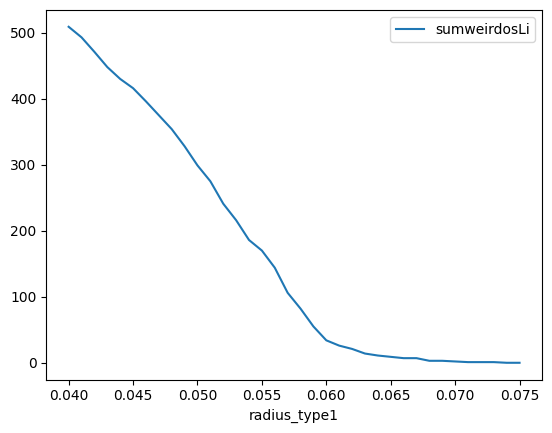

In [212]:
radius_sumweirdosLi_df.plot(x="radius_type1", y="sumweirdosLi")

In [213]:
min_sumweirdos = int(radius_sumweirdosLi_df["sumweirdosLi"].min())

In [214]:
radius_sumweirdosLi_df.to_excel(f'07_varying_radius_{min_sumweirdos}_{file_perfect_poscar_48n24_wo_cif}_{var_excel_file}.xlsx', index=False)

In [215]:
# radius_sumweirdosLi_df(radius_sumweirdosLi_df)